###Keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#Google Drive e Data Sets

In [0]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path = '/gdrive/My Drive/Colab Notebooks/DataSets'

path_credito = os.path.join(path, 'credit_data.csv')
base_credito = pd.read_csv(path_credito)

path_census = os.path.join(path, 'census.csv')
base_census = pd.read_csv(path_census)

#Naive Bayes

O algoritmo gera uma tabela de propabilidades e calcula onde o novo registro se encaixa na tabela

###Considerações Importantes
* Esse modelo não aceita atributos categóricos. Precisamos converte-los em atributos numéricos. Ex: Atributo de classificação de cor (branco, negro, pardo, etc..), iremos converter cada classe em um atributo e atribuir 1, onde o atributo é verdadeiro e 0 para falso.

* O modelo não aceita dados faltantes, nulos (NaN)

* O escalonamento de dados numéricos não apresentou nenhuma diferença no resultado

* Sempre testar as possibilidades:
  * LabelEncoder
  * LabelEncoder + OneHotEncoder
  * LabelEncoder + Escalonamento
  * LabelEncoder + OneHotEncoder + Escalonamento

##1.Base Risco de Créditos

In [0]:

base_credito.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


###Base Line

In [0]:
import collections
collections.Counter(base_credito.iloc[:,4].values)

Counter({0: 1717, 1: 283})

### Criando Previsores (X)  e classe (y)

In [0]:
previsores = base_credito.iloc[:, 0:4].values
classe = base_credito.iloc[:,4].values

### Transformando variáveis categóricas em atributos discretos

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:,0])
previsores[:, 1] = labelencoder.fit_transform(previsores[:,1])
previsores[:, 2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:,3])
previsores

array([[0.000e+00, 1.849e+03, 1.795e+03, 1.730e+03],
       [1.000e+00, 5.610e+02, 1.304e+03, 1.530e+03],
       [2.000e+00, 1.473e+03, 1.964e+03, 1.718e+03],
       ...,
       [1.997e+03, 9.440e+02, 4.530e+02, 1.316e+03],
       [1.998e+03, 9.210e+02, 1.996e+03, 4.090e+02],
       [1.999e+03, 1.983e+03, 1.675e+03, 1.641e+03]])

### Importando modelo

In [0]:
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()

### Gerando a tabela de probabilidade

In [0]:
classificador.fit(previsores, classe)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predizendo um resultado

In [0]:
resultado = classificador.predict([[0,0,1,2]])
resultado

array([0])

### Correção Laplaciana é feita automaticamente - Quando a base de dados é pequena e faltam alguns valores e o calculo da probabilidade de alguma possibilidade é 0

In [0]:
resultado = classificador.predict([[3,0,0,0]])
resultado

array([0])

In [0]:
classificador.classes_

array([0, 1])

In [0]:
classificador.class_count_

array([1717.,  283.])

In [0]:
classificador.class_prior_

array([0.8585, 0.1415])

##2.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92

In [0]:
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

###Base Line

In [0]:
import collections
classe_count = collections.Counter(classe)

base_line = classe_count[0] / len(classe)
base_line

0.8585

### Altero valores faltantes em valores reais, utilizando a média dos valores como estratégia

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

### Transforma todos os valores numéricos na mesma escala

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

### Divide a base de dados em treino e teste

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

### Trinamento do modelo

In [0]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predizendo valores de teste

In [0]:
previsoes = classificador.predict(previsores_teste)

### Acurácia e Matriz de confusão

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

### Precisão - Resultado percentual de acertos

In [0]:
precisao

0.938

### Matriz de confusão - Comparação de acertos e erros

In [0]:
matriz

array([[428,   8],
       [ 23,  41]])

##3.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz, precisao

(array([[1172, 2521],
        [  35, 1157]]), 0.4767656090071648)

#Árvore de Decisão

O algoritmo gera uma árvore com várias condições e percorre essa árvore para classificar o novo registro.

##Considerações Importantes

* Esse modelo não aceita atributos categóricos. Precisamos converte-los em atributos numéricos. Ex: Atributo de classificação de cor (branco, negro, pardo, etc..), iremos converter cada classe em um atributo e atribuir 1, onde o atributo é verdadeiro e 0 para falso.
* Não é necessário fazer o escalonamento dos dados

##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92

In [0]:
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
precisao

0.982

In [0]:
matriz

array([[430,   6],
       [  3,  61]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


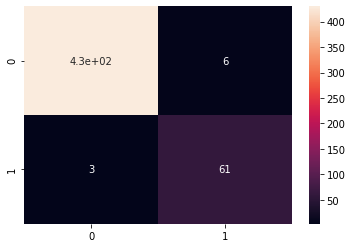

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
precisao

0.8092118730808597

In [0]:
matriz

array([[3224,  469],
       [ 463,  729]])

#Random Forest

O algoritmo gera várias árvores com várias condições cada, submete o novo registro a cada árvore e classifica com o resultado da maioria das árvores 

##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92

In [0]:
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

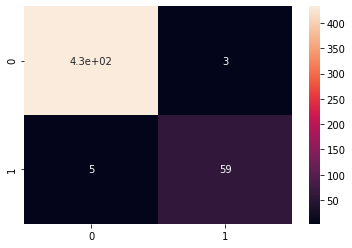

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

In [0]:
precisao

0.984

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
precisao

0.849539406345957

In [0]:
matriz

array([[3428,  265],
       [ 470,  722]])

#kNN - k-Nearest Neighbor

O algoritmo armazena todos os registros de treinamento e classifica o novo registro calculando a distância dele com os registros armazenados.

##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
base_credito.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

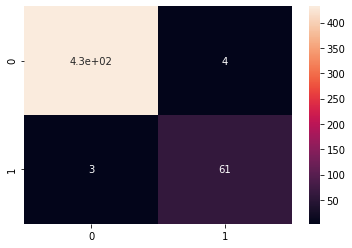

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

In [0]:
precisao

0.986

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

###Transforma as variáveis categóricas em variáveis numéricas. A função LabelEncoder enumera cada categoria.


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

Para não considerarmos pesos para as categorias enumeradas, transformamos ela em um array binário, onde todas as colunas serão preenchidos por 0, menos a coluna correspondente a classe atribuída a variável.

###Deixa todas as variáveis numéricas, que eram categóricas, com o mesmo peso

In [0]:
# Transfora a coluna em varias colunas 
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
previsores

array([[39, 77516, 13, ..., 1, 0, 0],
       [50, 83311, 13, ..., 1, 0, 0],
       [38, 215646, 9, ..., 1, 0, 0],
       ...,
       [58, 151910, 9, ..., 1, 0, 0],
       [22, 201490, 9, ..., 1, 0, 0],
       [52, 287927, 9, ..., 1, 0, 0]], dtype=object)

In [0]:
classe.shape

(32561,)

In [0]:
previsores.shape

(32561, 108)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz

array([[3336,  357],
       [ 511,  681]])

In [0]:
precisao

0.8223132036847492

#Regressão Logística

Algoritmo baseado na regressão linear. Ele calcula o sigmóide e traça uma linha para dividir e classificar o novo registro

##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(random_state=1)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

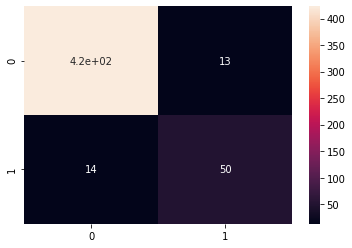

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

In [0]:
precisao

0.946

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz

array([[3423,  270],
       [ 465,  727]])

In [0]:
precisao

0.849539406345957

#SVM - Vetores de Suporte de Maquina

O algoritmo traça várias retas e encontra a melhor reta baseado na máxima distância da reta para os elementos mais próximos a reta.
Para problemas não lineares, o algoritmo utiliza um método chamado Kernel Trick para separar os dados de acordo que consigamos traçar uma reta
.

* Sempre utilizar o hot encoder


##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

* Parâmetro 'kernel' é onde ele transforma os dados lineares em não lineares
* Parâmetro 'c' é o custo. A tendência é termos resultados melhores com custo mais alto.

In [0]:
from sklearn.svm import SVC

classificador = SVC(kernel='rbf', C=2)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

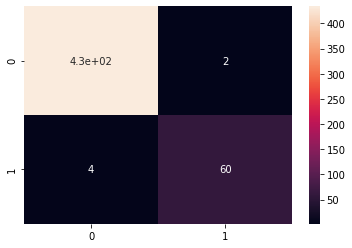

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

In [0]:
precisao

0.988

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

* Parâmetro 'kernel' é onde ele transforma os dados lineares em não lineares
* Parâmetro 'c' é o custo. A tendência é termos resultados melhores com custo mais alto.

In [0]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear')
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz

array([[3459,  234],
       [ 495,  697]])

In [0]:
precisao

0.8507676560900717

#Redes Neurais

As redes neurais são treinadas para que se ajustem os pesos (w) de cada atributo (x). No final da rede existe uma função soma, que gera o resultado para a função de ativação, baseado nas entradas e pesos. A função de ativação calcula o resultado final da rede neural. Existema várias funções de ativação e a mais famosa é a Sigmoide.

Após isso, precisamos calculal a função do erro, para verificar se os pesos estão ajustados ou não:
* Erro Simples
> $erro = 1 - FunçãoAtivação$
* Mean Square Error
> $MSE=\frac{1}{N}\sum_{i=1}^N(f_i - y_i)^2$
* Root Mean Square Error
> $RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^N(f_i - y_i)^2}$

Para isso, calculamos o deltada função de saída:

> $DeltaSaída = Erro * DerivadaSigmoide$

E a o delta para a função da camada oculta:

> DeltaCamadaOculta = DerivadaSigmoide * peso * DeltaSaida

>$peso_{n+1}=(peso_n * momento) + (entrada * delta * TaxaApendizagem)$




##1.Base Créditos

In [0]:
base_credito.loc[base_credito.age < 0, 'age'] = 40.92
previsores = base_credito.iloc[:, 1:4].values
classe = base_credito.iloc[:, 4].values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

####Parâmetros Importantes:
* verbose: Mostra o erro a cada iteração.
* max_iter: Máximo de iterações no ajuste dos pesos.
* tol: Valor de tolerância do ajuste do erro. Caso o erro não melhore mais que o valor da tolerância, ele interrompe as iterações. 
* solver: Algoritmo usado para o ajuste dos pesos.
* hidden_layers_size: Número de camadas ocultas.
* activation: Função de aticação.
* batch_size: Tamanho do conjunto de registros utilizados por vez para fazer a atualização dos pesos.
* learning_rate: Taxa de aprendizado.
* momentum: Utilizado para a decida do gradiente descendente estocástico, quando o parâmentro solver estiver setado como sgd.


In [0]:
from sklearn.neural_network import MLPClassifier

classificador = MLPClassifier(verbose=True, max_iter=1000, tol=0.0000010, solver='adam', hidden_layer_sizes=(80), activation='relu')
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

Iteration 1, loss = 0.77418116
Iteration 2, loss = 0.69675953
Iteration 3, loss = 0.62559032
Iteration 4, loss = 0.56693583
Iteration 5, loss = 0.51433311
Iteration 6, loss = 0.46905519
Iteration 7, loss = 0.42978637
Iteration 8, loss = 0.39630029
Iteration 9, loss = 0.36630207
Iteration 10, loss = 0.34045477
Iteration 11, loss = 0.31777405
Iteration 12, loss = 0.29759674
Iteration 13, loss = 0.28010681
Iteration 14, loss = 0.26431858
Iteration 15, loss = 0.25040483
Iteration 16, loss = 0.23780282
Iteration 17, loss = 0.22653367
Iteration 18, loss = 0.21622429
Iteration 19, loss = 0.20704980
Iteration 20, loss = 0.19861199
Iteration 21, loss = 0.19096093
Iteration 22, loss = 0.18394202
Iteration 23, loss = 0.17750632
Iteration 24, loss = 0.17153850
Iteration 25, loss = 0.16609065
Iteration 26, loss = 0.16106110
Iteration 27, loss = 0.15627230
Iteration 28, loss = 0.15189087
Iteration 29, loss = 0.14778258
Iteration 30, loss = 0.14391528
Iteration 31, loss = 0.14031620
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

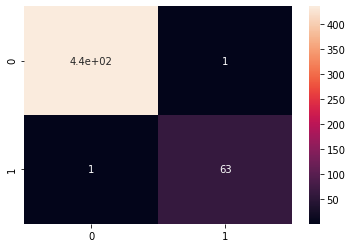

In [0]:
import seaborn as sns
ax = sns.heatmap(matriz,annot=True)

In [0]:
matriz

array([[435,   1],
       [  1,  63]])

In [0]:
precisao

0.996

##2.Base Census

In [0]:
classe = base_census.iloc[:, 14].values
previsores = base_census.iloc[:, 0:14].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

In [0]:
# Melhores resultados sem o one hot enconder
# previsores = pd.get_dummies(pd.DataFrame(previsores), columns=[1,3,5,6,7,8,9,13]).values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [0]:
from sklearn.neural_network import MLPClassifier

classificador = MLPClassifier(verbose=True, max_iter=1000, tol=0.00001)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

Iteration 1, loss = 0.42803398
Iteration 2, loss = 0.35481058
Iteration 3, loss = 0.33543686
Iteration 4, loss = 0.32791934
Iteration 5, loss = 0.32441136
Iteration 6, loss = 0.32273499
Iteration 7, loss = 0.32142694
Iteration 8, loss = 0.32048426
Iteration 9, loss = 0.31962804
Iteration 10, loss = 0.31927973
Iteration 11, loss = 0.31845286
Iteration 12, loss = 0.31777658
Iteration 13, loss = 0.31711053
Iteration 14, loss = 0.31645915
Iteration 15, loss = 0.31591605
Iteration 16, loss = 0.31567220
Iteration 17, loss = 0.31528865
Iteration 18, loss = 0.31499562
Iteration 19, loss = 0.31460029
Iteration 20, loss = 0.31395113
Iteration 21, loss = 0.31351057
Iteration 22, loss = 0.31297783
Iteration 23, loss = 0.31245751
Iteration 24, loss = 0.31210016
Iteration 25, loss = 0.31160494
Iteration 26, loss = 0.31096660
Iteration 27, loss = 0.31027363
Iteration 28, loss = 0.31023638
Iteration 29, loss = 0.30992603
Iteration 30, loss = 0.30938066
Iteration 31, loss = 0.30912503
Iteration 32, los

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [0]:
matriz

array([[3416,  277],
       [ 469,  723]])